# 1. Introduction
## 1.1 Definition
**Word2Vec** is a machine learning algorithm used to **transform** words into **vector representations, or "word embeddings,"** where words with similar meanings or contexts are positioned close together in a **continuous vector space**. It learns these representations from a large text corpus, enabling the algorithm to capture the semantic and syntactic relationships between words.

### Word2Vec operates using two main models:
#### 1. Continuous Bag of Words (CBOW):
Predicts a word based on its surrounding context.
#### 2. Skip-gram:
Predicts the surrounding context words given a specific word.
These learned word embeddings are useful in natural language processing tasks, as they encode semantic similarities and relationships between words in a way that can be mathematically manipulated.


## 1.2 [What is Gensim?](https://radimrehurek.com/gensim/intro.html#what-is-gensim)
**Gensim** is a free open-source Python library for representing documents as semantic vectors, as efficiently (<u>*computer-wise*</u>) and painlessly (<u>*human-wise*</u>) as possible.


## Gensim logo
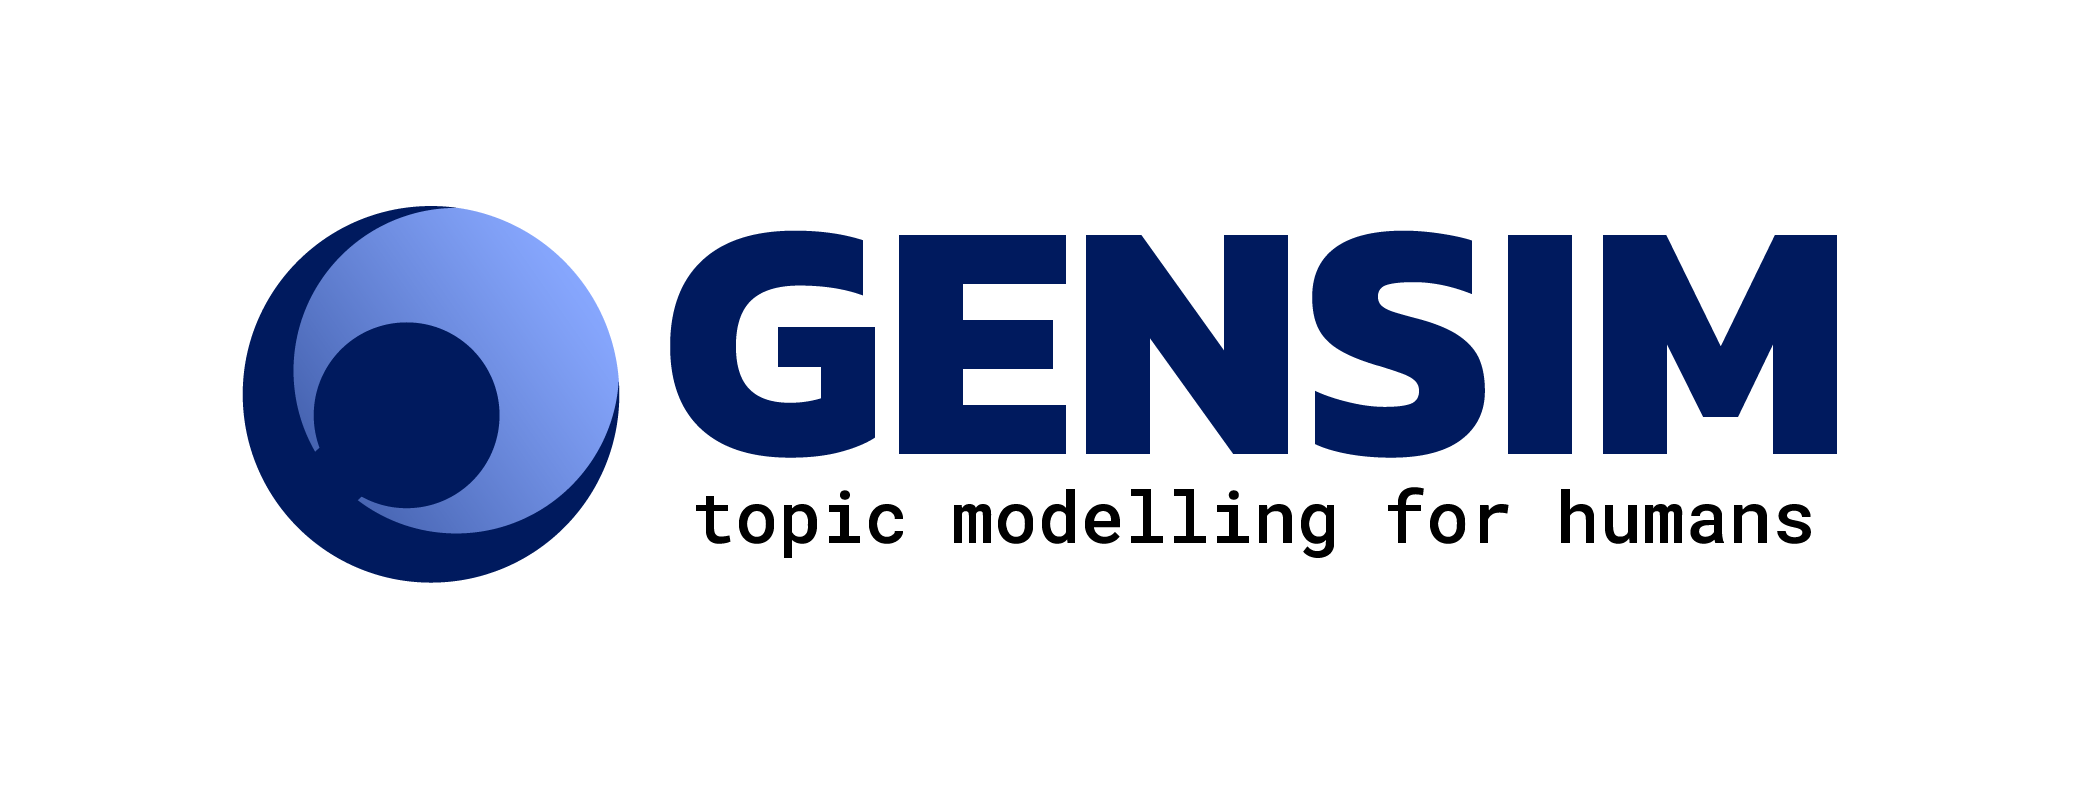


**Gensim** is designed to process raw, unstructured digital texts <u>*(“plain text”)*</u> using unsupervised machine learning algorithms.<br>
<br>
Once these statistical patterns are found, any plain text documents (sentence, phrase, word…) can be succinctly (*with concise and precise brevity; to the point*) expressed in the new, semantic representation and queried for topical similarity against other documents (words, phrases…).

#### Please look into these:
* [Gensim - API Reference](https://radimrehurek.com/gensim/apiref.html)
* [models.keyedvectors – Store and query word vectors](https://radimrehurek.com/gensim/models/keyedvectors.html)
* [models.word2vec – Word2vec embeddings](https://radimrehurek.com/gensim/models/word2vec.html)

*italicized text*## 1.3 Topic modelling
**Topic modeling** is an unsupervised machine learning technique that’s capable of scanning a set of documents, detecting word and phrase patterns within them, and automatically clustering word groups and similar expressions that best characterize a set of documents.

It is a type of statistical modeling used to uncover the hidden themes or topics within a large collection of documents or texts. It helps identify patterns of word co-occurrence that represent different topics and assign words or documents to one or more of these topics. Topic modeling is commonly used in natural language processing (*NLP*) to analyze and summarize large text corpora.

In [1]:
# !pip install --upgrade gensim

In [2]:
# import nltk
# nltk.download('all')
# nltk.download('averaged_perceptron_tagger')
# from nltk.corpus import stopwords
# import re
from gensim.models import Word2Vec

In [3]:
paragraph="""I have three visions for India. In 3000 years of our history, people from all over the world have come and invaded us, captured our lands, conquered our minds.
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British, the French, the Dutch, all of them came and looted us, took over what was ours.
               Yet we have not done this to any other nation. We have not conquered anyone.
               We have not grabbed their land, their culture, their history and tried to enforce our way of life on them.
               Why? Because we respect the freedom of others.That is why my first vision is that of freedom. I believe that India got its first vision of this in 1857, when we started the War of Independence. It is this freedom that we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision for India’s development. For fifty years we have been a developing nation.
               It is time we see ourselves as a developed nation. We are among the top 5 nations of the world in terms of GDP. We have a 10 percent growth rate in most areas. Our poverty levels are falling.
               Our achievements are being globally recognised today. Yet we lack the self-confidence to see ourselves as a developed nation, self-reliant and self-assured. Isn’t this incorrect?
               I have a third vision. India must stand up to the world. Because I believe that unless India stands up to the world, no one will respect us. Only strength respects strength. We must be strong not only as a military power but also as an economic power. Both must go hand-in-hand.
               My good fortune was to have worked with three great minds. Dr. Vikram Sarabhai of the Dept. of space, Professor Satish Dhawan, who succeeded him and Dr. Brahm Prakash, father of nuclear material.
               I was lucky to have worked with all three of them closely and consider this the great opportunity of my life.
               I see four milestones in my career."""

#### Cleaning and Preprocessing data

#### re.sub(pattern, repl, string, count=0, flags=0)

**pattern** is a regular expression that you want to match. Besides a regular expression, the pattern can be Pattern object.<br>
**repl** is the replacement<br>
**string** is the input string<br>

**[^a-zA-Z]** :
* matches a single character not in the range between a (index 97) to z (index 122) (case sensitive) and between A (index 65) to Z (index 90) (case sensitive)

In [4]:
text=re.sub(r'[^a-zA-Z]', ' ', paragraph)
text=text.lower()
text=re.sub(r'\s+', ' ', text)

NameError: name 're' is not defined

In [ ]:
# text=re.sub(r'\[[0-9]*\]', ' ', paragraph)    # match substring from [0-9]*=>0 to 9 at any number of times(*) and replace with whitespace
# text=re.sub(r'\s+', ' ', text)                # match substring of whitespace 1 or more times(+) and replace with whitespace
# text=text.lower()                             # lower down all the characters of words/string
# text=re.sub(r'\d', ' ', text)                 # match substring any digit and replace with whitespace
# text=re.sub(r'\s+', ' ', text)                # match substring of whitespace 1 or more times(+) and replace with whitespace
text

#### Data tokenization

In [ ]:
# sent_list=nltk.sent_tokenize(text)
# sent_list

In [ ]:
# word_list=[nltk.word_tokenize(sentence) for sentence in sent_list]
# word_list

#### **List Comprehension**

In [ ]:
word_list=[nltk.word_tokenize(sentence) for sentence in nltk.sent_tokenize(text)]

for i in range(len(word_list)):
  word_list[i]=[word for word in word_list[i] if word not in set(stopwords.words('english'))]

word_list

#### Word2Vec model training

In [ ]:
# min_count   :   Ignores all words with total frequency lower than this.
w2v_model=Word2Vec(sentences=word_list, min_count=1)  # min_count=1, means, if at least a single time a word is present then consider the word and apply the model algorithm
w2v_model

In [ ]:
print(w2v_model.max_vocab_size)
print(w2v_model.corpus_count)
print(w2v_model.corpus_total_words)
print(w2v_model.max_final_vocab)

#### finding vector of words

In [ ]:
vector=w2v_model.wv['war']
print("len(vector) : ", len(vector))
vector

#### most similar words

In [ ]:
similar=w2v_model.wv.most_similar('freedom')
similar

In [ ]:
similar=w2v_model.wv.most_similar('vikram')
similar

In [ ]:
#Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British, the French, the Dutch
w2v_model.wv.similarity('alexander', 'greeks') # 'turks', 'moguls', 'portuguese', 'british', 'french', 'dutch')

In [ ]:
key1 = 'turks'
keys_list = ['moguls', 'portuguese', 'british', 'french', 'dutch']
w2v_model.wv.most_similar_to_given(key1, keys_list)#, 'moguls', 'portuguese', 'british', 'french', 'dutch')

In [ ]:
w2v_model.wv.similar_by_word('india')

In [ ]:
w2v_model.wv.words_closer_than('india', 'british')

In [ ]:
#w2v_model.wv.doesnt_match(['india', 'freedom', 'nation', 'poverty', 'professor satish dhawan'])
w2v_model.wv.doesnt_match(['india', 'freedom', 'nation'])

In [ ]:
w2v_model.wv.most_similar(positive=['india', 'freedom', 'nation'], negative=['poverty'], topn=3)